In [5]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Part 1. Using Naïve Bayes to work with Text Data  

## 1. Representing text as data 

In [17]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

#### (1) Learning the Vocabulary

In [18]:
vect = CountVectorizer()
vect.fit(simple_train)
print("Vocabulary: ", vect.vocabulary_)
print(vect.get_feature_names_out())

Vocabulary:  {'call': 1, 'you': 5, 'tonight': 4, 'me': 2, 'cab': 0, 'please': 3}
['cab' 'call' 'me' 'please' 'tonight' 'you']


#### (2) Transform training data into a 'document-term matrix' (which is a sparse matrix). Print the sparse matrix. 



In [19]:
simple_train_sparse = vect.transform(simple_train)
print (simple_train_sparse)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


#### (3) Convert the sparse matrix to a dense matrix

In [20]:
dense_matrix = simple_train_sparse.toarray()
print(dense_matrix)

[[0 1 0 0 1 1]
 [1 1 1 0 0 0]
 [0 1 1 2 0 0]]


#### (4) Examine the vocabulary and document-term matrix together 

In [21]:
pd.DataFrame(simple_train_sparse.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


#### (5) Transform testing data into a document-term matrix (using existing vocabulary)

In [22]:
simple_test = ["please don't call me"]
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

#### (6) Examine the vocabulary and document-term matrix together again.

In [23]:
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


## 2. Analyzing SMS data with Naïve Bayes 

#### (1) Read into the data from the file “sms.tsv” ; give the names of columns as ['label', 'message']; and print the first 10 samples to view part of the data.

In [24]:
input = '/sms-1.tsv'
data = pd.read_table(input, names=['label', 'message'])
data.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


#### (2) Convert label to a numeric variable.

In [37]:
data.replace(to_replace="ham", value=0, inplace=True)
data.replace(to_replace="spam", value=1, inplace=True)
data

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


#### (3) Then define the X and y 

In [26]:
X = data.message
y = data.label

#### (4) Split into training and testing sets by train_test_split(); and print the shape of training set and test set.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4179,)
(1393,)
(4179,)
(1393,)


#### (5) Vectorizing SMS data by using CountVectorizer() and transform training and test sets into document-term matrices respectively.

In [28]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
print(X_train_dtm)
X_test_dtm = vect.transform(X_test)
print(X_test_dtm)

  (0, 509)	1
  (0, 3181)	1
  (0, 5193)	1
  (0, 4781)	1
  (0, 3971)	1
  (0, 5479)	1
  (0, 3880)	1
  (0, 1572)	1
  (0, 4987)	1
  (0, 2864)	2
  (0, 3170)	1
  (0, 7424)	1
  (0, 4983)	1
  (0, 264)	1
  (0, 1552)	1
  (0, 4375)	1
  (0, 4743)	1
  (0, 50)	1
  (0, 6656)	1
  (0, 6892)	1
  (0, 4662)	1
  (0, 4779)	1
  (0, 2022)	1
  (1, 2222)	1
  (1, 7420)	1
  :	:
  (4177, 4255)	1
  (4177, 4446)	1
  (4177, 4778)	1
  (4177, 2744)	1
  (4177, 254)	1
  (4177, 5490)	1
  (4177, 2556)	1
  (4177, 4508)	1
  (4177, 6034)	1
  (4177, 6662)	1
  (4177, 307)	1
  (4177, 837)	1
  (4177, 3700)	1
  (4177, 5796)	1
  (4177, 358)	1
  (4177, 4934)	1
  (4177, 2453)	1
  (4177, 2097)	1
  (4177, 5403)	1
  (4177, 2786)	1
  (4177, 6577)	1
  (4178, 1691)	1
  (4178, 4238)	1
  (4178, 7257)	1
  (4178, 5999)	1
  (0, 1538)	1
  (0, 5189)	1
  (0, 6542)	1
  (0, 7405)	1
  (1, 1016)	1
  (1, 3050)	1
  (1, 4163)	1
  (1, 4238)	1
  (1, 4370)	1
  (1, 5200)	1
  (1, 6656)	1
  (1, 7407)	1
  (1, 7420)	1
  (2, 986)	1
  (2, 3244)	1
  (2, 7162)	1
  (3

In [29]:
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### (6) Use the two Naïve Bayes models (GaussianNB and MultinomialNB)

#### 1) Using  multinomial Naive Bayes classifier

##### a) Calculate accuracy of predictions

In [30]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [31]:
y_pred_class = nb.predict(X_test_dtm)

In [32]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.9885139985642498


##### b) Give the confusion matrix

In [33]:
print (metrics.confusion_matrix(y_test, y_pred_class))

[[1203    5]
 [  11  174]]


##### c) Print message text for the false positives

In [34]:
X_test[y_test < y_pred_class]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

##### d) Print message text for the false negatives

In [35]:
X_test[y_test > y_pred_class]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

#### 2) Using  Gaussian Naive Bayes classifier

##### a) Calculate accuracy of predictions

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_dtm.toarray(), y_train)
y_pred_class = gnb.predict(X_test_dtm.toarray())
from sklearn import metrics
print("Accuracy Score :")
print (metrics.accuracy_score(y_test, y_pred_class))

Accuracy Score :
0.8994974874371859


##### b) Give the confusion matrix

In [42]:
print (metrics.confusion_matrix(y_test, y_pred_class))

[[1079  129]
 [  11  174]]


##### c) Print message text for the false positives

In [43]:
print(X_test[y_test < y_pred_class])

3465                                             My phone
1242    I want to show you the world, princess :) how ...
3214                                       What's ur pin?
574                                Waiting for your call.
4487                                 have * good weekend.
                              ...                        
2285                              Velly good, yes please!
2155    Oh god i am happy to see your message after 3 ...
1925                                                   Ok
1988                     No calls..messages..missed calls
3207                                        At home also.
Name: message, Length: 129, dtype: object


##### d) Print message text for the false negatives

In [44]:
print(X_test[y_test > y_pred_class])

3530    Xmas & New Years Eve tickets are now on sale f...
1875    Would you like to see my XXX pics they are so ...
349     Fancy a shag? I do.Interested? sextextuk.com t...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
165     BangBabes Ur order is on the way. U SHOULD rec...
2821    INTERFLORA - It's not too late to order Inter...
191     Are you unique enough? Find out from 30th Augu...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object


# Part 2: Analyzing Boston housing

In [45]:
from sklearn.datasets import load_boston

#### (1) Read into the data and process it in the right format for using machine learning.

In [46]:
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [47]:
df.columns=['0','1','2','3','4','5','6','7','8','9','10','11','12']
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#### (2) Then, use the DataFrame corr() method to show what features are correlated with each other.

In [48]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


#### (3) The columns don't have any labels. Given the name of columns as ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']; then use the DataFrame corr() again.

In [49]:
df.columns= ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


#### (4) Now, you have the numbers from the correlation matrix, but it's not as easy to view or interpret as a plot. Please write codes to plot correlations by color same as (similar with) the following figure:

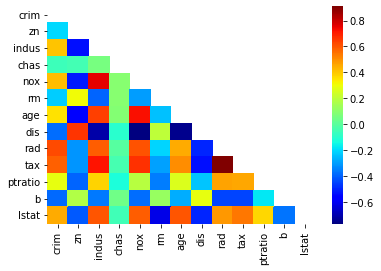

In [50]:
corr_matrix = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), cmap='jet',mask=corr_matrix)
plt.show()

#### (5) According to your output, answer the following questions: 

#### 6) Next, building the Linear Regression model



In [51]:
df['medv'] = boston_dataset.target
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = df['medv']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, test_size = 0.25, random_state=5)

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# model evaluation for training set
train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, train_predict)))
r2 = r2_score(y_train, train_predict)
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())
print(coef_table)

          0      Coefs
0      crim  -0.153005
1        zn   0.047939
2     indus  -0.008601
3      chas   2.579867
4       nox -14.632565
5        rm   3.962834
6       age  -0.007924
7       dis  -1.460780
8       rad   0.345431
9       tax  -0.012450
10  ptratio  -0.919093
11        b   0.013220
12    lstat  -0.517255


##### (a) What do the metrics of R Squared and Mean Squared Error? What are the numbers telling you?

In [54]:
print("For training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

For training set
RMSE is 4.638337420049743
R2 score is 0.7468034208269783


In [55]:
test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, test_predict)))
r2 = r2_score(y_test, test_predict)

In [56]:
print("For testing set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

For testing set
RMSE is 4.9269268628312135
R2 score is 0.7059096071098054


##### RSME indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values while R2 score tells us how well a model can predict the value of the response variable in percentage terms. R-squared is a relative measure of fit, RMSE is an absolute measure of fit.

##### The RMSE score of 4.63 and 4.92 is considered as decent but not great. RSME should be close to 0 to consider it as a better performing model.

##### The R2 score of our model explains 74% and 70% (training and testing set respectiviely) of the fitted data in the regression model. R2 value is high, it suggests a better fit for the model. So our model is good, but not perfect.

##### (b) What you think could improve the model?

##### 1. Tuning the hyperparameters would give better accuracy. 
##### 2. Dropping the unnnecessary columns in the dataset would help reduce the noise and impact the model accuracy in a positive way. (Feature Selection)

# Part 3: Face Recognition

In [57]:
from sklearn.datasets import fetch_lfw_people       
faces = fetch_lfw_people(min_faces_per_person=60)
X = faces.data
y = faces.target

### 1. Visualizing the data first: Use subplots to plot some samples. The deploys of subplots should be 3 rows and 5 columns.

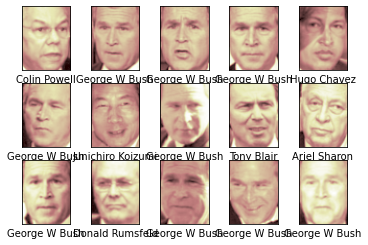

In [58]:
fig, ax = plt.subplots(3, 5)
for i, axes in enumerate(ax.flat):
    axes.imshow(faces.images[i], cmap = 'pink')
    axes.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

### 2. Dimensionality reduction: Since each image contains very high dimensions, use PCA approach to reduce to 150 components.


In [59]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

### 3. Processing data for training and testing.

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### 4. Since using SVM classifier with ‘rbf’ kernel, GridserachCV is used to tune the optimal parameters: C [1, 5, 10, 50] and gamma [0.0001, 0.0005, 0.001, 0.005].

In [61]:
from sklearn.model_selection import GridSearchCV
parameter = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
Gridsearch = GridSearchCV(model, parameter)

### 5. Use model attribute to print the best parameters C and gamma.

In [62]:
Gridsearch.fit(X_train, y_train)
Gridsearch.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

### 6. Use this best trained estimator (model) to predict the test set.

In [64]:
model = Gridsearch.best_estimator_
pred = model.predict(X_test)

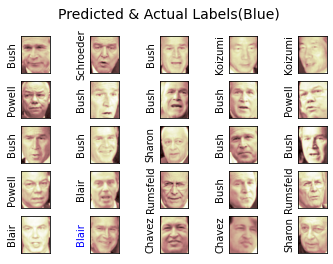

In [65]:
fig, ax = plt.subplots(5, 5)
for i, axes in enumerate(ax.flat):
    axes.imshow(X_test[i].reshape(62, 47), cmap='pink')
    axes.set(xticks=[], yticks=[])
    axes.set_ylabel(faces.target_names[pred[i]].split()[-1],
                   color='black' if pred[i] == y_test[i] else 'blue')
fig.suptitle('Predicted & Actual Labels(Blue)', size=14);


### 7. Print out the classification report.

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



### 8. Use the confusion matrix to plot ‘True labels’ and ‘Predicted labels’.

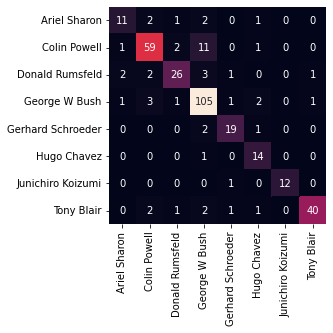

In [67]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)